Import libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings("ignore")

In [57]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<Axes: >

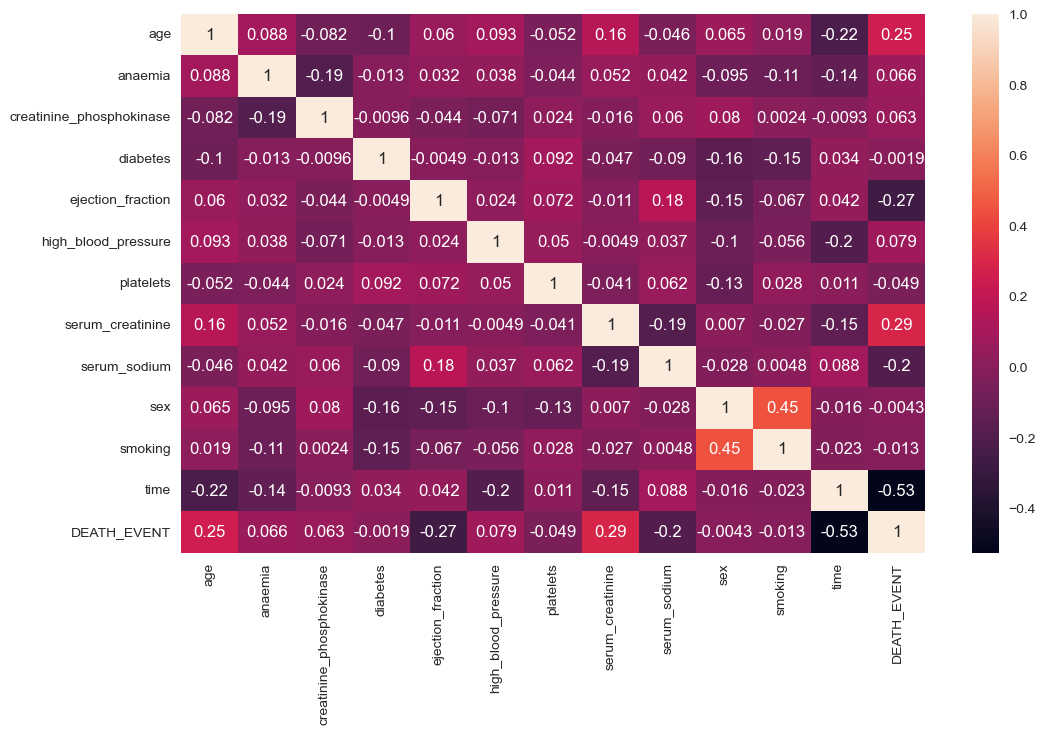

In [59]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True)

menghapus kolom target dan standarisasi

In [6]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

In [7]:
minmax = MinMaxScaler()
X = pd.DataFrame(minmax.fit_transform(X), columns=X.columns.tolist())
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206


Pake K-Means => elbow

In [8]:
wcss = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

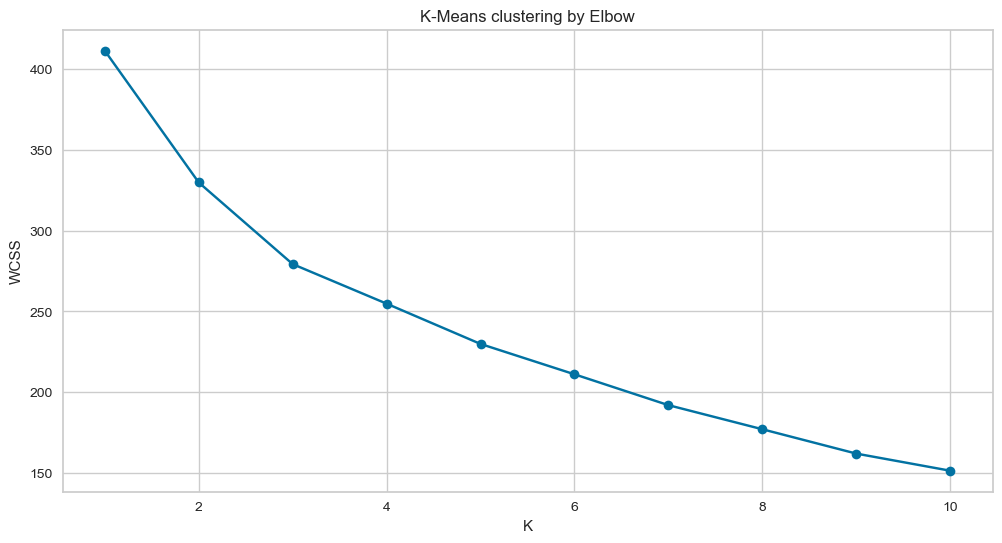

In [9]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss, 'o-')
plt.title('K-Means clustering by Elbow')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [10]:
for i in range(1, len(wcss)):
    print(f'Elbow {i}: {wcss[i]}')

Elbow 1: 329.7704089674798
Elbow 2: 279.251682699095
Elbow 3: 254.78315425661145
Elbow 4: 229.85646299040658
Elbow 5: 211.07321454248307
Elbow 6: 191.98513846302123
Elbow 7: 177.07415990074512
Elbow 8: 162.0109533301282
Elbow 9: 151.42024753365496


In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, random_state=42)
y_pred = kmeans.fit_predict(X)

In [12]:
print(y_pred)

[1 1 1 0 2 0 0 0 2 0 0 1 0 0 2 0 0 1 2 2 2 2 0 1 2 1 2 1 0 1 1 1 2 2 1 1 0
 2 1 2 1 2 1 1 2 1 1 1 0 2 0 2 2 2 2 0 0 0 1 1 1 2 1 1 2 1 2 0 2 1 1 1 1 1
 1 0 2 1 0 2 2 1 2 0 2 1 1 0 1 0 1 1 2 0 2 0 0 2 2 2 0 1 1 1 2 2 1 0 1 1 1
 1 1 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 1 0 0 0 2 1 1 1 2 0 2 1 1 2 2 2 0 1 1 1
 0 1 2 1 1 1 2 0 2 1 0 0 0 0 0 2 1 2 1 1 2 2 0 1 0 0 1 0 1 2 0 1 1 0 1 1 0
 0 2 2 2 2 1 2 0 0 1 0 2 2 2 1 0 1 1 1 0 2 2 1 2 2 1 1 1 2 0 1 2 2 0 2 1 1
 0 1 1 2 0 0 2 2 2 1 0 0 0 0 1 1 2 0 2 1 1 2 1 0 1 1 1 2 2 2 1 2 0 0 2 1 0
 1 1 2 0 2 1 0 1 0 2 1 1 2 2 1 0 2 2 1 2 2 1 1 1 1 0 0 1 2 2 2 2 1 1 0 1 2
 2 1 1]


In [13]:
kmeans.labels_

array([1, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2,
       0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0,
       1, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1,
       1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0,
       2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0,
       1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 2, 2,
       2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2,
       1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1,
       1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2,
       1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 0,
       1, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1])

In [14]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206


In [15]:
X['target'] = y_pred

In [16]:
clusters = kmeans.cluster_centers_

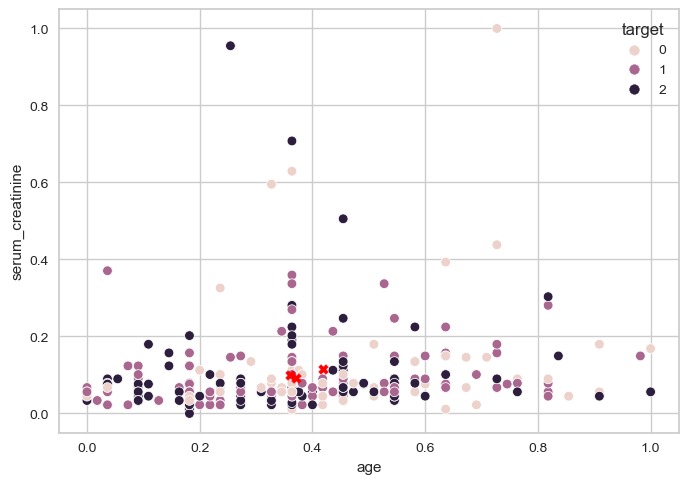

In [17]:
sns.scatterplot(x=X['age'], y=X['serum_creatinine'], hue=X['target'], legend=True)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 7], marker='X', c='red')

Pake K-Means => silhoutte

In [18]:
silhoutte_scores = []

for i in range (2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhoutte_scores.append(score)

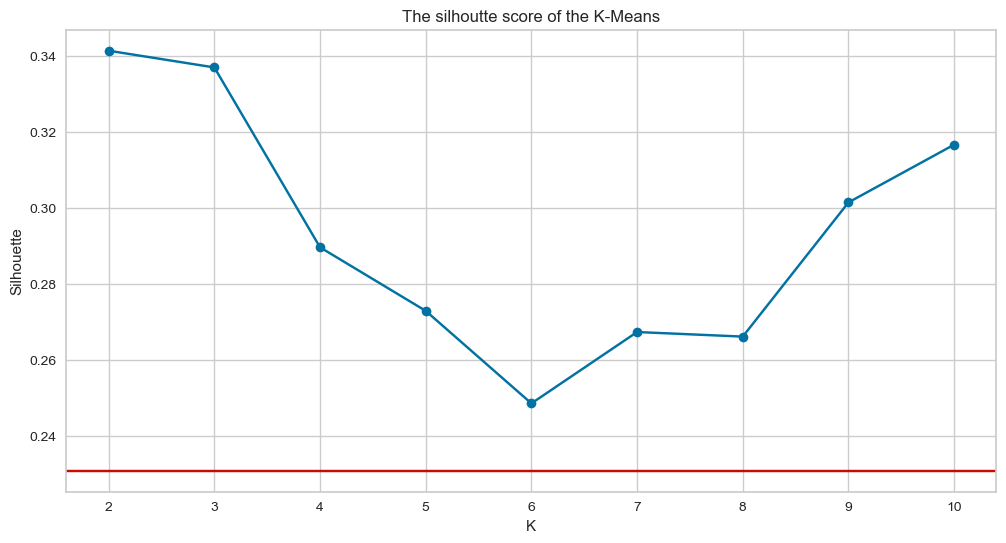

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhoutte_scores, 'o-')
plt.title('The silhoutte score of the K-Means')
plt.axhline(y=0.23084254463781206, color='r', linestyle='-')
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

In [20]:
for i in range(1, len(silhoutte_scores)):
    print(f'Silhoutte point in cluster {i+1}: {silhoutte_scores[i]}')

Silhoutte point in cluster 2: 0.3368673767154173
Silhoutte point in cluster 3: 0.28957556583253535
Silhoutte point in cluster 4: 0.27286904142688967
Silhoutte point in cluster 5: 0.24854032371956236
Silhoutte point in cluster 6: 0.26730502825665664
Silhoutte point in cluster 7: 0.26610438373844864
Silhoutte point in cluster 8: 0.3013819025835064
Silhoutte point in cluster 9: 0.3165617259337408


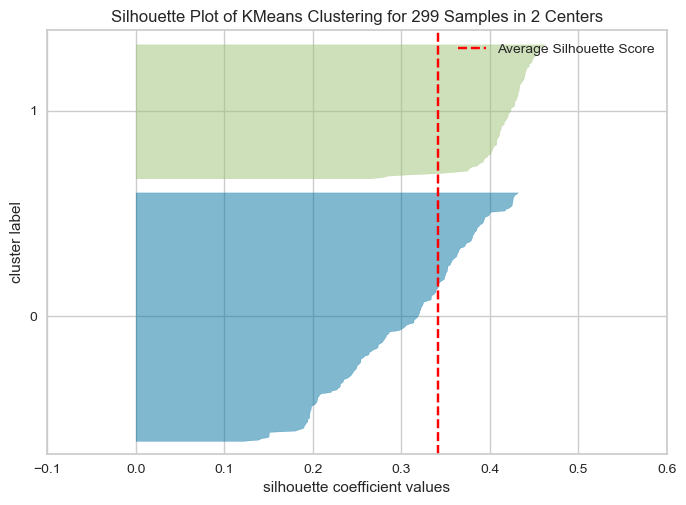

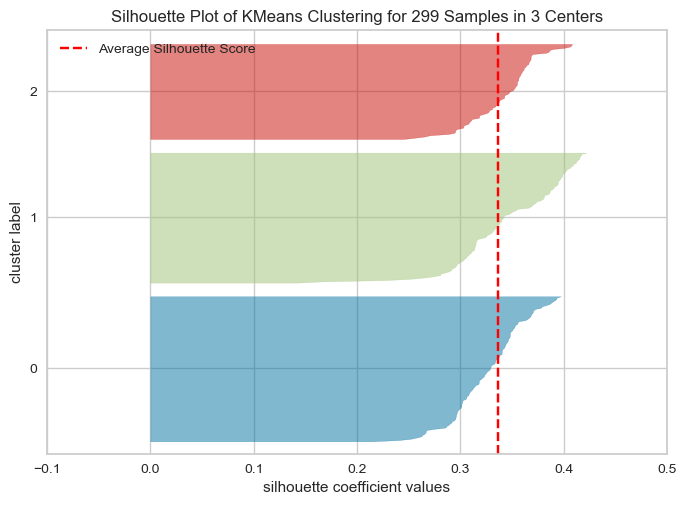

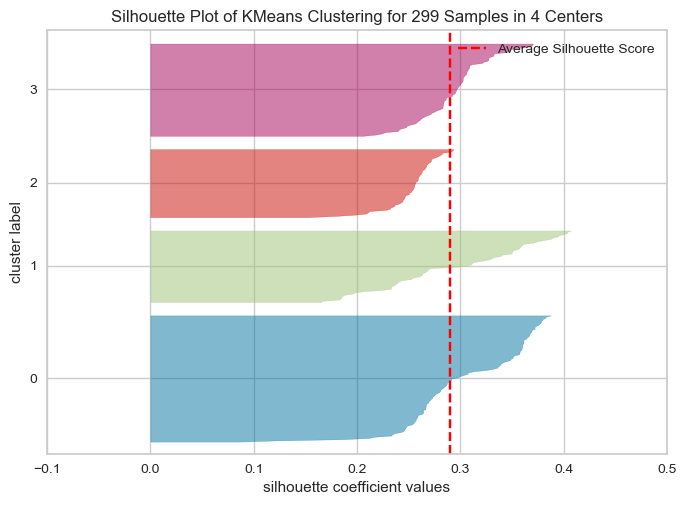

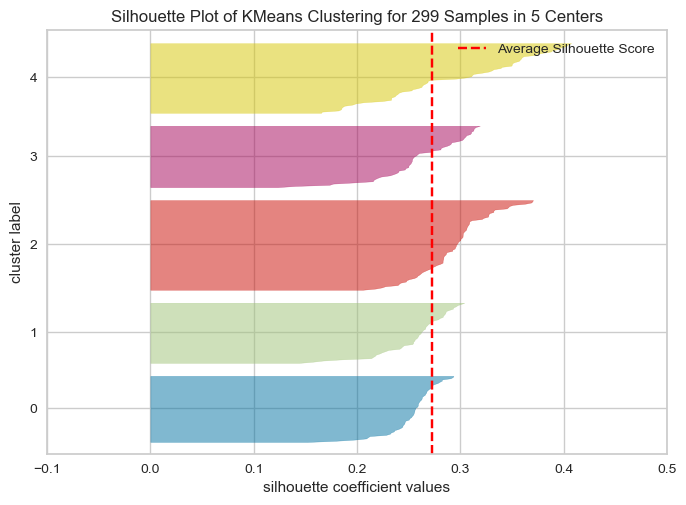

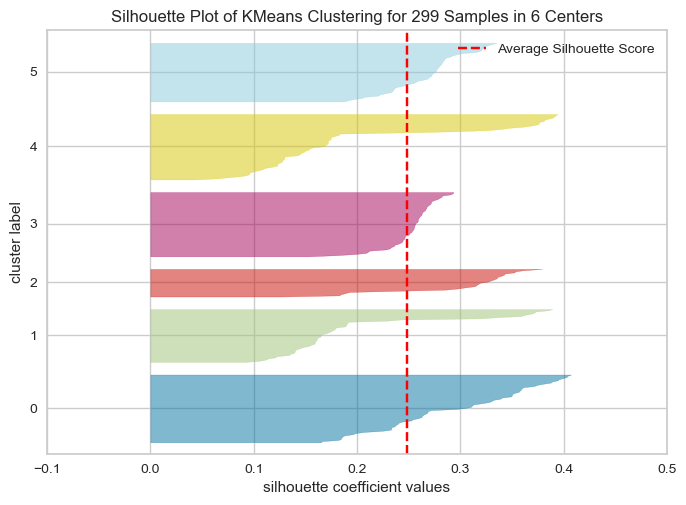

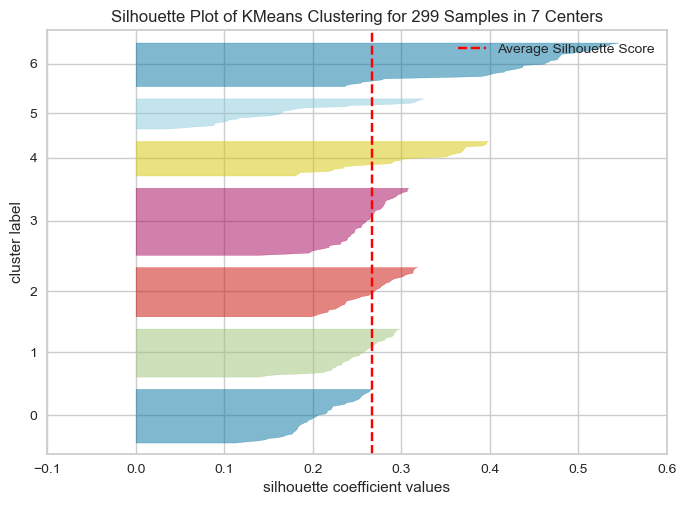

In [21]:
for i in range(2, len(silhoutte_scores) - 1):
    model = KMeans(n_clusters=i, random_state=42)
    visualizer =SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)
    visualizer.show()

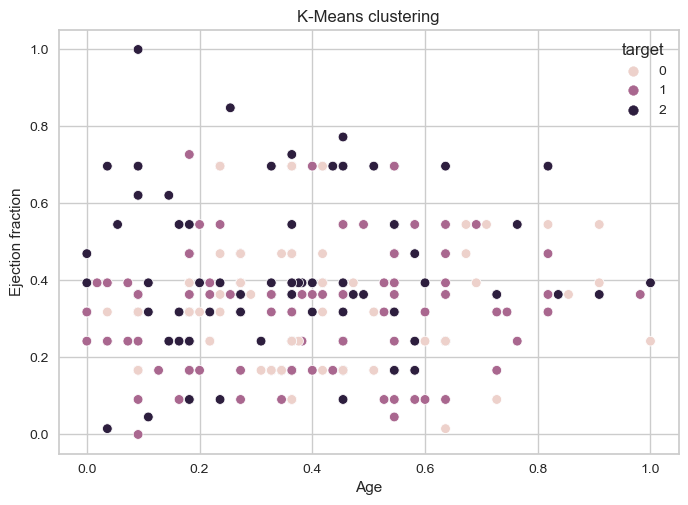

In [22]:
sns.scatterplot(data=X, x='age', y='ejection_fraction', hue='target', legend=True)
plt.title('K-Means clustering')
plt.xlabel('Age')
plt.ylabel('Ejection fraction')
plt.grid(True)
plt.show()

Menggunakan dendogram untuk menentukan jumlah clusters

In [49]:
X2 = X.copy()
X2.drop('target', axis=1, inplace=True)

In [50]:
X3 = X2[['age', 'ejection_fraction']]

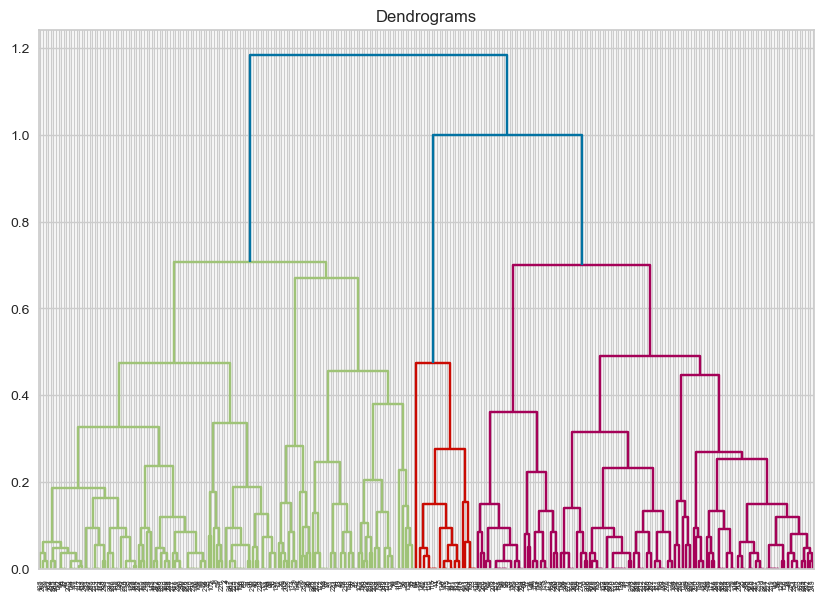

In [51]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(X3, method='complete'))

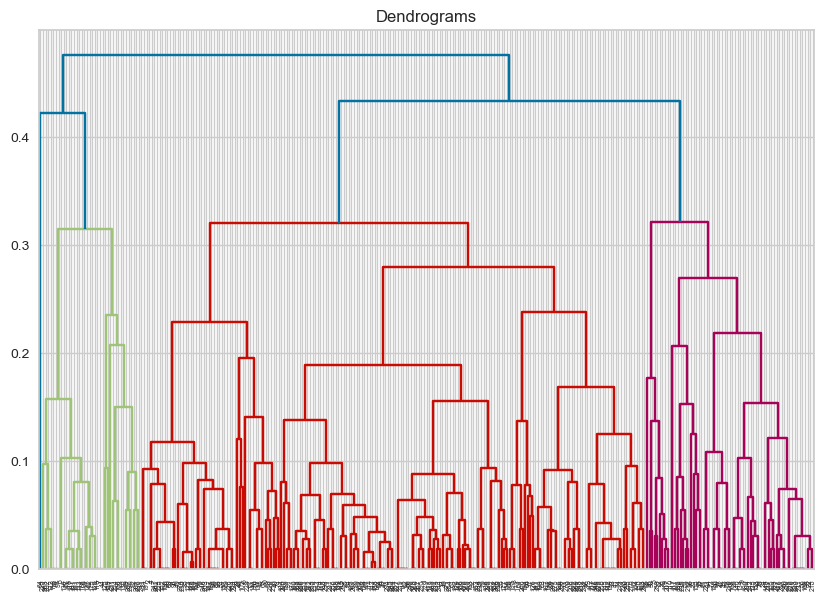

In [52]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(X3, method='average'))

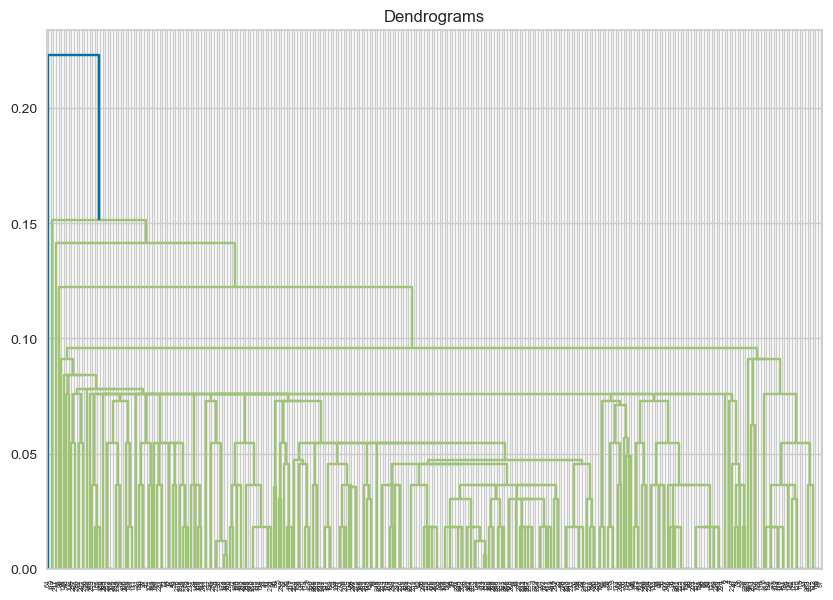

In [53]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(X3, method='single'))

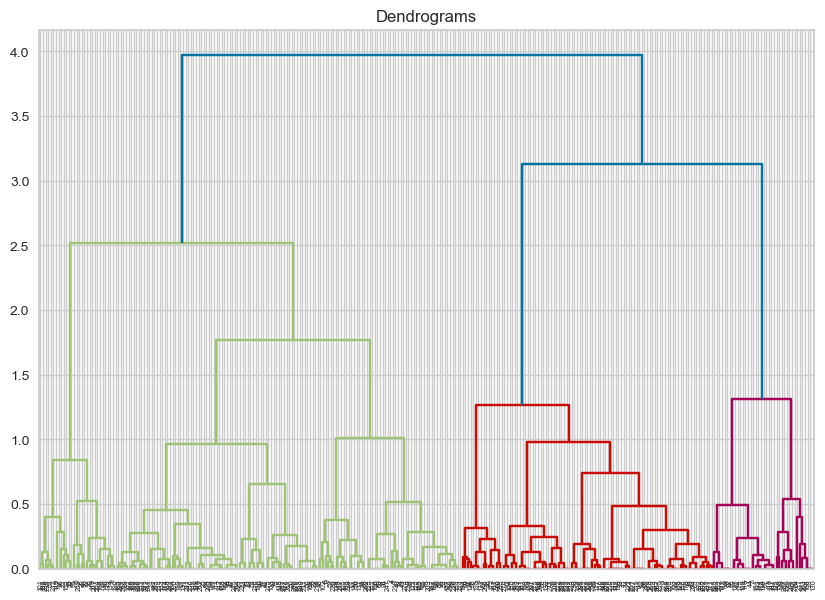

In [54]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(X3, method='ward'))

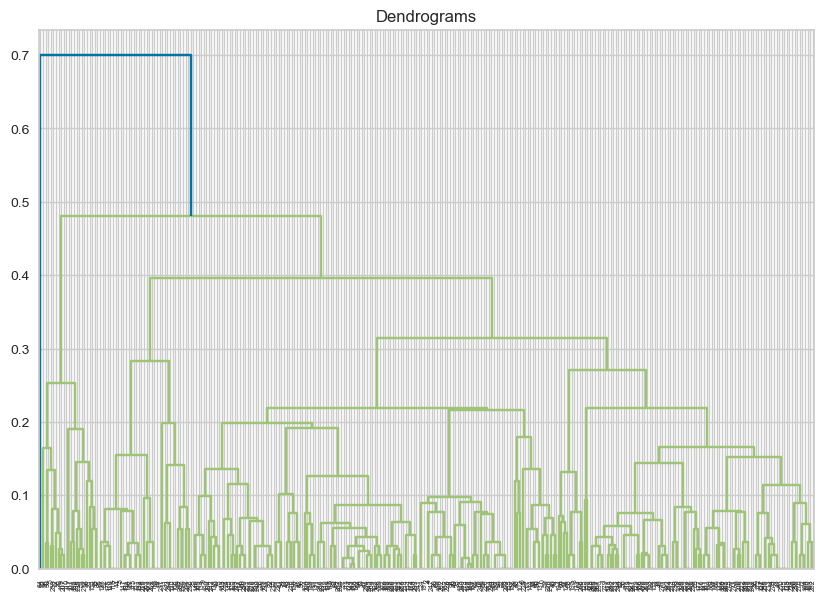

In [55]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(X3, method='centroid'))

Pake Agglomerative

In [30]:
ag = AgglomerativeClustering(n_clusters=2, linkage='ward').fit_predict(X3)
cluster = sch.fcluster(ag, 2, criterion='maxclust')

In [31]:
print(labels)

[1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1
 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0
 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1
 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1
 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0
 0 0 0]


In [32]:
X3['target'] = labels
X3

,age,ejection_fraction,target
0,0.636364,0.090909,1
1,0.272727,0.363636,0
2,0.454545,0.090909,1
3,0.181818,0.090909,0
4,0.454545,0.090909,1
...,...,...,...
294,0.400000,0.363636,1
295,0.272727,0.363636,0
296,0.090909,0.696970,0
297,0.090909,0.363636,0


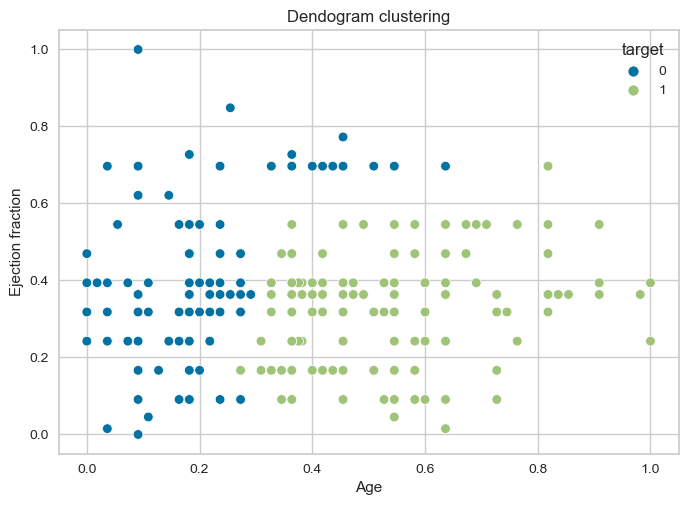

In [33]:
sns.scatterplot(data=X3, x='age', y='ejection_fraction', hue='target', legend=True)
plt.title('Dendogram clustering')
plt.xlabel('Age')
plt.ylabel('Ejection fraction')
plt.grid(True)
plt.show()

In [34]:
print(f'accuracy prediction by Dendogram: {accuracy_score(labels, y)}')

accuracy prediction by Dendogram: 0.5819397993311036


In [35]:
clustering = DBSCAN(eps=0.75, min_samples=2).fit(X)
clustering.labels_

array([ 0, -1,  1,  2,  3,  4,  2,  5,  6,  4,  4,  7,  2,  8,  9,  2,  2,
       10,  9,  3,  9, 11,  4, 12, 13, 14,  9, 15,  2, 14, 16, 10, 11,  3,
       16, 12, 17, 11, 12, 18,  7, -1, 15, 16,  3, 14,  0, 15,  8, 19,  8,
        9, 18, 11, -1,  2, 20, 20,  7, 15, -1, 21,  1, 10,  6,  1,  3, 20,
        6, 12,  1, 14,  1, 14,  1, 20, -1, 12, 22, 21,  6,  1,  3,  8, 11,
       10,  0, 23, 16,  8, 14, 12,  6,  2, 13,  8, 23, 19, 11,  3,  2,  0,
        1,  1, 21, -1, 10, 17,  1, 14,  1,  1, 12, 19, 23, 19, 11, 19, 11,
        6,  4, 11, 18,  9, 10, 19, 13,  3,  7, 17,  4, 17, 21,  7,  1, 10,
        3,  2, 18,  0, 10, 19, 18,  9,  4,  1,  1, 10,  2,  0, 21, 16,  7,
       14,  9, 17, 19,  1,  2,  4,  8, 20, 20,  3, 12, 13,  1, 12, 18, 21,
        5,  1,  4,  2, 15, 20,  1, 19, 17,  1, 12,  5, 14,  0, 20, 17,  6,
       18, 11, 21, 12, 19, 17,  5,  0,  2, 13,  6, 11, 14,  2, 16,  0,  7,
       20,  3, 19, 10,  3, 13, 15,  7,  1, 11,  8,  0, 21, -1, 17, 13, 10,
        1, 20, 10, 12, 18

In [36]:
nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

In [37]:
distances = np.sort(distances[:, 1], axis=0)

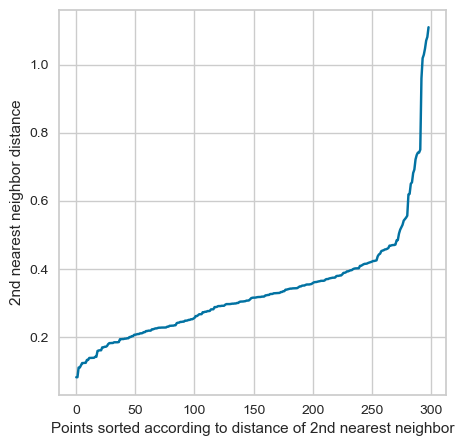

In [38]:
plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points sorted according to distance of 2nd nearest neighbor")
plt.ylabel("2nd nearest neighbor distance")
plt.show()

In [39]:
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.3, min_samples=2)

In [40]:
target = dbscan.labels_
target

array([-1, -1,  0,  1, -1, -1, -1, -1, -1, -1, -1,  2,  1, -1,  3, -1, -1,
       -1,  4, -1,  4,  5, -1, -1, -1, -1, -1,  6, -1, -1, -1, -1, -1, -1,
        7, -1, -1, -1, -1, -1,  2, -1,  6,  7, -1, -1, -1, -1, -1, -1,  8,
        3, -1, -1, -1, -1,  9, -1, -1, -1, -1, 10, 11, -1, -1,  0, -1,  9,
       12, -1, -1, 13, 14, 13, -1,  9, -1, -1, -1, 10, 12, 11, -1, -1,  5,
       15, 16, -1, -1,  8, 13, -1, -1, 17, -1, -1, -1, 18,  5, -1, 17, -1,
       -1, -1, 10, -1, 15, -1, 11, -1, -1, 11, -1, 18, -1, 19, 20, -1, 20,
       -1, 21,  5, 22, 23, -1, 19, -1, 24, -1, -1, 21, -1, 10, -1, 14, 25,
       24, 17, 22, 16, 25, 19, 22, 23, -1, 11, 11, -1, 17, 16, 26, -1, -1,
       -1, 23, -1, 19, 11, -1, -1, 27, -1, -1, -1, 28, -1, -1, -1, 22, 26,
       29, -1, -1, -1, -1, -1, -1, 19, -1, 11, 28, 29, 30, 31, 32, 33, -1,
       -1,  5, 10, -1, -1, -1, -1, -1, -1, 34, 35, 36, -1, -1, -1, -1, -1,
       -1, -1, 19, -1, 37, 34, -1, -1, -1, 36, 27, 31, -1, -1, 33, 34, 38,
       -1, 39, -1, -1, -1

In [41]:
X['target'] = target
X['target'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

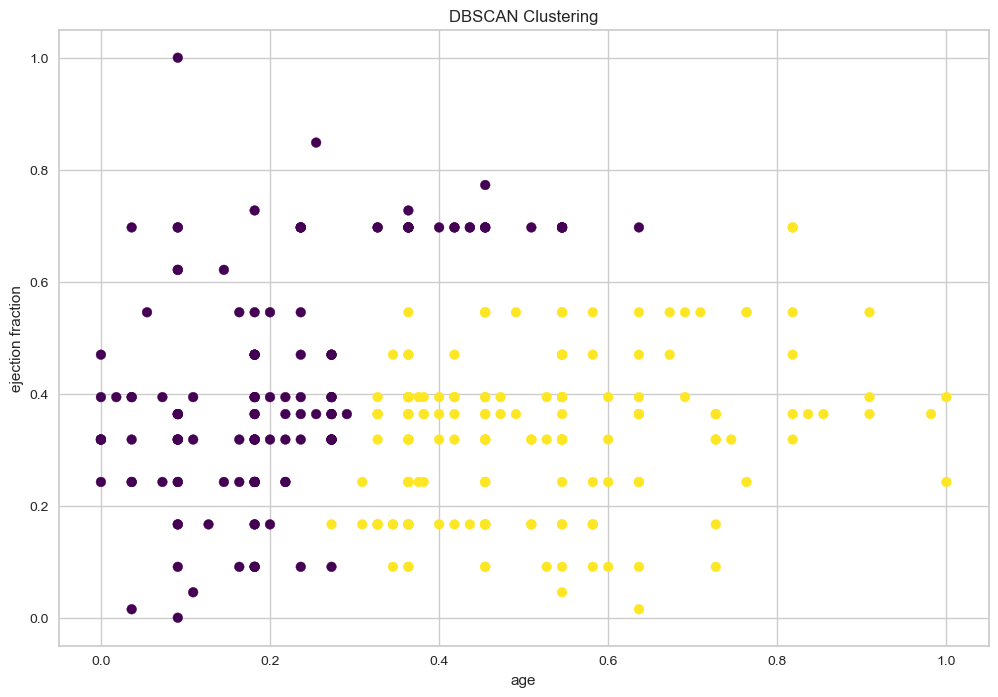

In [42]:
feature1 = X.iloc[:, 0]
feature2 = X.iloc[:, 4]

plt.figure(figsize=(12, 8))
plt.scatter(feature1, feature2, c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('age')
plt.ylabel('ejection fraction')
plt.grid(True)
plt.show()

Knee Locator

In [43]:
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [44]:
kn = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
knee_point = kn.knee
print(f'The knee point is at: {knee_point}')

The knee point is at: 2


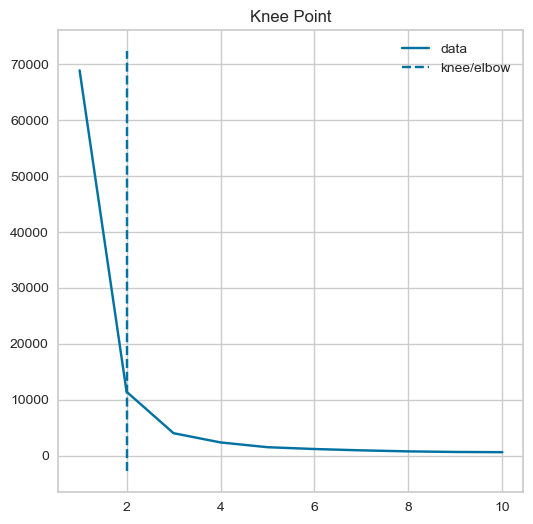

In [45]:
kn.plot_knee()

In [46]:
db = DBSCAN(eps=0.35, min_samples=2)
y_pred = db.fit_predict(X)

In [47]:
age_val = X.iloc[:, 0]
ejection_val = X.iloc[:, 4]
serum_creatinine_val = X.iloc[:, 6]

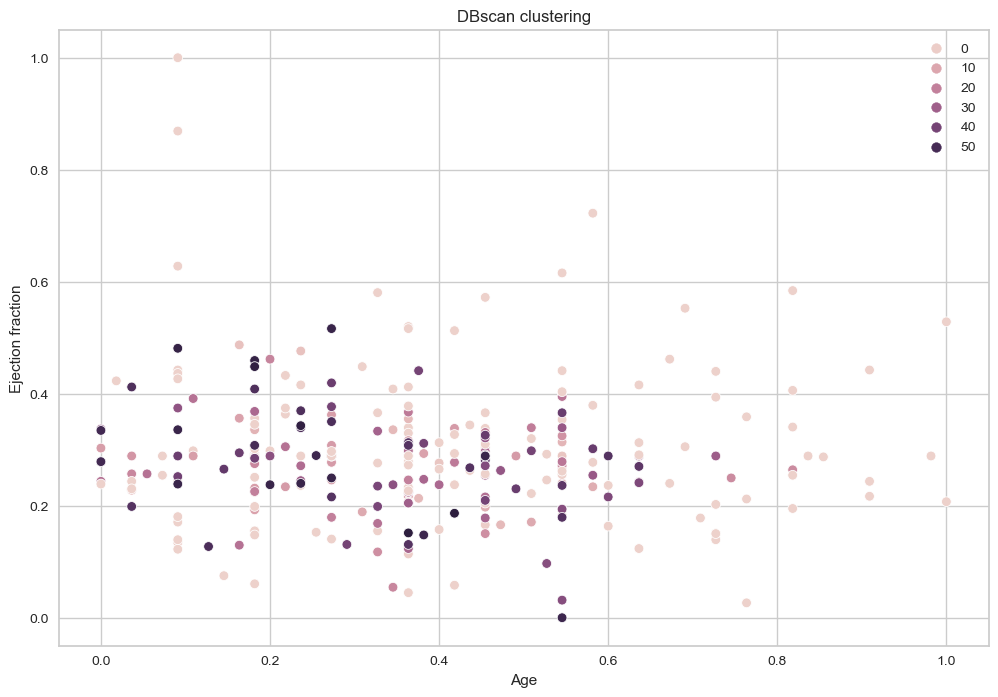

In [48]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=age_val, y=serum_creatinine_val, hue=y_pred, legend=True)
plt.title('DBscan clustering')
plt.xlabel('Age')
plt.ylabel('Ejection fraction')
plt.grid(True)
plt.show()